In [17]:
import os
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/commit.csv')
pr_df = pd.read_csv('C:/Users/Admin/Downloads/pr.csv')
issue_df = pd.read_csv('C:/Users/Admin/Downloads/issue.csv')
files_df = pd.read_csv('C:/Users/Admin/Downloads/file_data.csv')
language_df = pd.read_csv('C:/Users/Admin/Downloads/languages.csv')

In [18]:
pr_df

,Author,Reviewer,Pr_state,Created_at,Updated_at,Additions,Commits,Merged_at
0,alextran1502,NaN,closed,2022-02-06 06:07:43,2024-05-29 17:11:53,581,14,2022-02-06 06:07:56
1,schklom,NaN,closed,2022-02-06 18:08:06,2024-03-09 04:16:39,53,2,2022-02-06 19:06:01
2,alextran1502,NaN,closed,2022-02-07 02:28:28,2024-03-09 23:22:33,133,3,2022-02-07 02:31:32
3,alextran1502,NaN,closed,2022-02-08 05:42:11,2024-02-13 22:15:20,10715,2,2022-02-08 05:42:35
4,alextran1502,NaN,closed,2022-02-08 17:24:07,2024-03-12 15:28:50,343,2,2022-02-08 17:24:49
...,...,...,...,...,...,...,...,...
4413,zackpollard,bo0tzz,closed,2024-06-13 11:13:55,2024-06-13 11:37:43,7,2,2024-06-13 11:37:15
4414,alextran1502,jrasm91,open,2024-06-13 12:33:47,2024-06-13 13:18:29,36,4,NaN
4415,zackpollard,jrasm91,closed,2024-06-13 12:38:18,2024-06-13 12:44:07,0,1,2024-06-13 12:44:06
4416,waclaw66,michelheusschen,open,2024-06-13 12:48:13,2024-06-13 13:41:07,102,1,NaN


In [19]:
pr_df['Date'] = pd.to_datetime(pr_df['Created_at']).dt.date

In [20]:
df['Date'] = pd.to_datetime(pr_df['Created_at']).dt.date

In [21]:
pr_df['Date']

0       2022-02-06
1       2022-02-06
2       2022-02-07
3       2022-02-08
4       2022-02-08
           ...    
4413    2024-06-13
4414    2024-06-13
4415    2024-06-13
4416    2024-06-13
4417    2024-06-13
Name: Date, Length: 4418, dtype: object

In [22]:
df_temp = pr_df['Date'].value_counts()
df_temp = df_temp.reset_index(name='Number of PR')
df_temp = df_temp.sort_values('Date', ascending=True)
df_temp = df_temp.reset_index(drop=True)

In [23]:
df = pr_df.drop(columns = ['Author', 'Reviewer','Created_at', 'Updated_at','Merged_at'])
df['Date'] = pd.to_datetime(pr_df['Created_at']).dt.date
df = df.groupby('Date').agg({
    'Additions': 'sum',
    'Commits':'sum'
})

In [29]:
df.insert(2, 'Number of PR',0)

In [30]:
for i in range(df.shape[0]-1):
    df['Number of PR'].iloc[i] = df_temp['Number of PR'].iloc[i].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\3295536869.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Number of PR'].iloc[i] = df_temp['Number of PR'].iloc[i].copy()
C:\Users\Admin\AppData\Local\Temp\ipykernel_7636\3295536869.p

In [31]:
df.dropna(inplace=True)

In [32]:
df

,Additions,Commits,Number of PR
Date,,,
2022-02-06,634,16,2
2022-02-07,133,3,1
2022-02-08,11058,4,2
2022-02-09,252,4,1
2022-02-10,254,5,1
...,...,...,...
2024-06-09,24853,49,5
2024-06-10,3059,80,19
2024-06-11,6136,171,32


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

In [51]:
model = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state=1)

In [52]:
train = df.iloc[:-100]
test = df.iloc[-100:]
predictors = ['Additions','Commits']
model.fit(train[predictors], train['Number of PR'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [36]:
preds = model.predict(test[predictors])

In [37]:
preds = pd.Series(preds, index=test.index)

In [38]:
preds

Date
2024-03-06    5
2024-03-07    5
2024-03-08    5
2024-03-09    5
2024-03-10    5
             ..
2024-06-09    6
2024-06-10    5
2024-06-11    8
2024-06-12    5
2024-06-13    4
Length: 100, dtype: int64

In [39]:
precision_score(test['Number of PR'],  preds, average='micro')

0.06

In [40]:
combined = pd.concat([test['Number of PR'], preds], axis=1)

<Axes: xlabel='Date'>

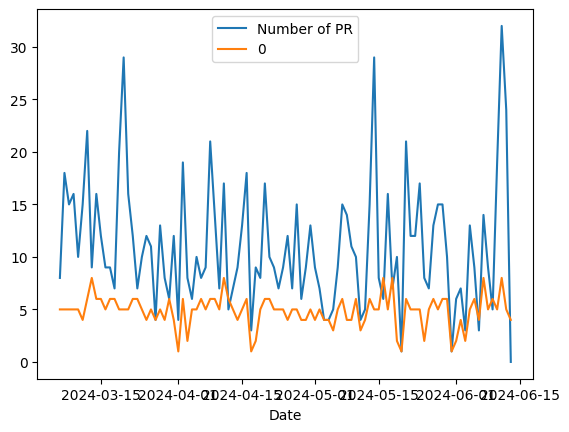

In [41]:
combined.plot()

In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Number of PR'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index=test.index, name='Predictions')
    combined = pd.concat([test['Number of PR'], preds], axis=1)
    return combined

In [46]:
def backtest(data, model, predictors, start=0, step=365):
    all_predictions=[]
    for i in range(start, data.shape[0], step):
        if i+ step < data.shape[0]:
            train=data.iloc[0:i].copy()
            test=data.iloc[i:(i+step)].copy()
            predictions = predict(train, test, predictors, model)
            all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [57]:
model2 = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state=1)

In [60]:
predictions = backtest(df, model2, predictors)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by RandomForestClassifier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
feature_columns = ['Commits', 'Additions']
X = df[feature_columns]
y = df['Number of PR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("Predictions:", y_pred)
print("True Values:", y_test.values)

KeyError: 'Number of PR'